# **1. Perkenalan Dataset**

**Dataset**: Pima Indians Diabetes Database. 

**Deskripsi**: Dataset ini bertujuan untuk memprediksi secara diagnostik apakah seorang pasien menderita diabetes atau tidak, berdasarkan pengukuran diagnostik tertentu yang disertakan dalam dataset. Semua pasien di sini adalah perempuan berusia minimal 21 tahun keturunan India Pima.

- **Sumber Dataset :** https://www.kaggle.com/code/mragpavank/pima-indians-diabetes-database

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set(style="whitegrid")

# **3. Memuat Dataset**

In [4]:
file_path = "../diabetes.csv"

try:
    df = pd.read_csv(file_path)
    
    print("Dataset berhasil dimuat!")
    print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")
    
    display(df.head())
    
    print("\nStruktur Data:")
    print(df.info())

except FileNotFoundError:
    print("Error: File 'diabetes.csv' tidak ditemukan. Pastikan file sudah diunggah.")

Dataset berhasil dimuat!
Jumlah baris: 768, Jumlah kolom: 9


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


# **4. Exploratory Data Analysis (EDA)**

In [3]:
display(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


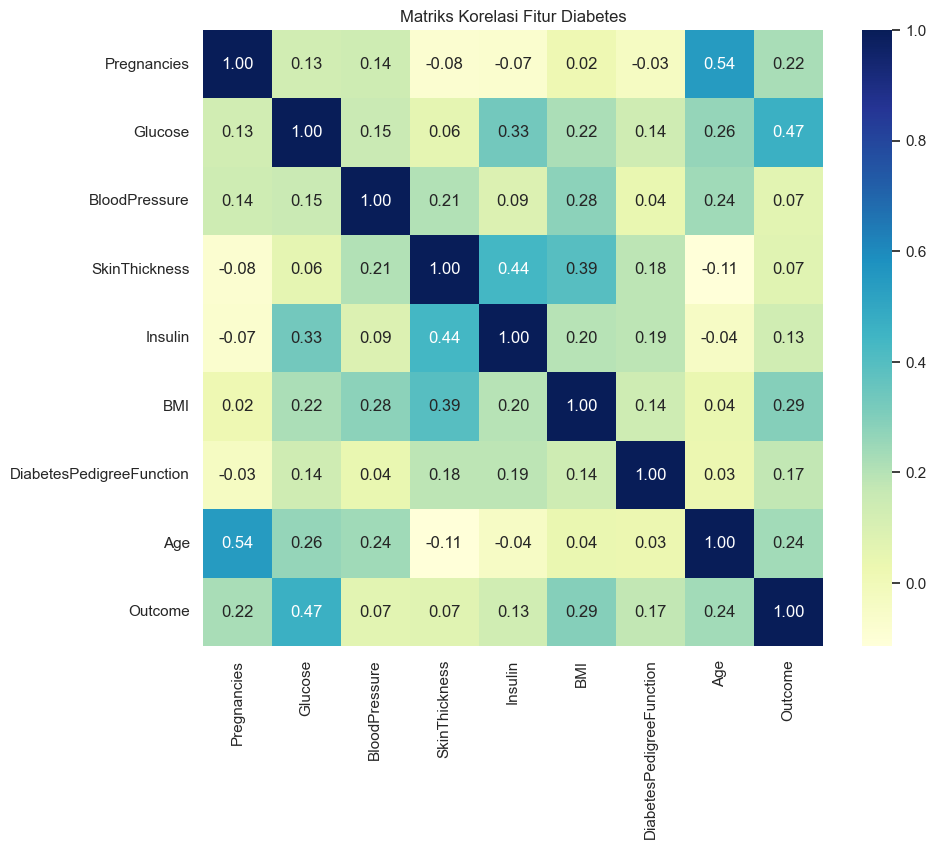

In [5]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Matriks Korelasi Fitur Diabetes")
plt.show()

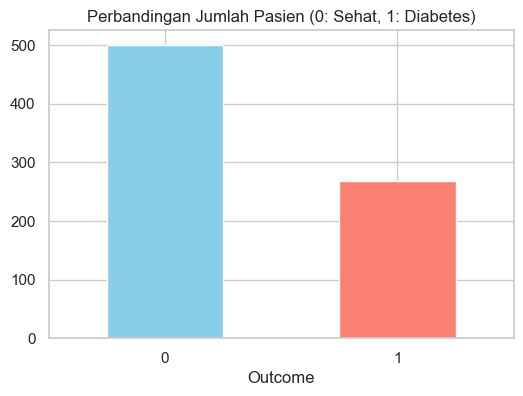

In [6]:
plt.figure(figsize=(6, 4))
df['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Perbandingan Jumlah Pasien (0: Sehat, 1: Diabetes)")
plt.xticks(rotation=0)
plt.show()

# **5. Data Preprocessing**

In [7]:
# Identifikasi jumlah nilai 0 pada kolom medis
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("Jumlah nilai 0 sebelum penanganan:")
print((df[cols_with_zeros] == 0).sum())

df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Imputasi dengan Median
for col in cols_with_zeros:
    df[col] = df[col].fillna(df[col].median())

print("\nJumlah nilai 0 setelah penanganan (seharusnya 0):")
print((df[cols_with_zeros] == 0).sum())

display(df[cols_with_zeros].describe())

Jumlah nilai 0 sebelum penanganan:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Jumlah nilai 0 setelah penanganan (seharusnya 0):
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,72.386719,29.108073,140.671875,32.455208
std,30.438286,12.096642,8.791221,86.383060,6.875177
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.750000,64.000000,25.000000,121.500000,27.500000
50%,117.000000,72.000000,29.000000,125.000000,32.300000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


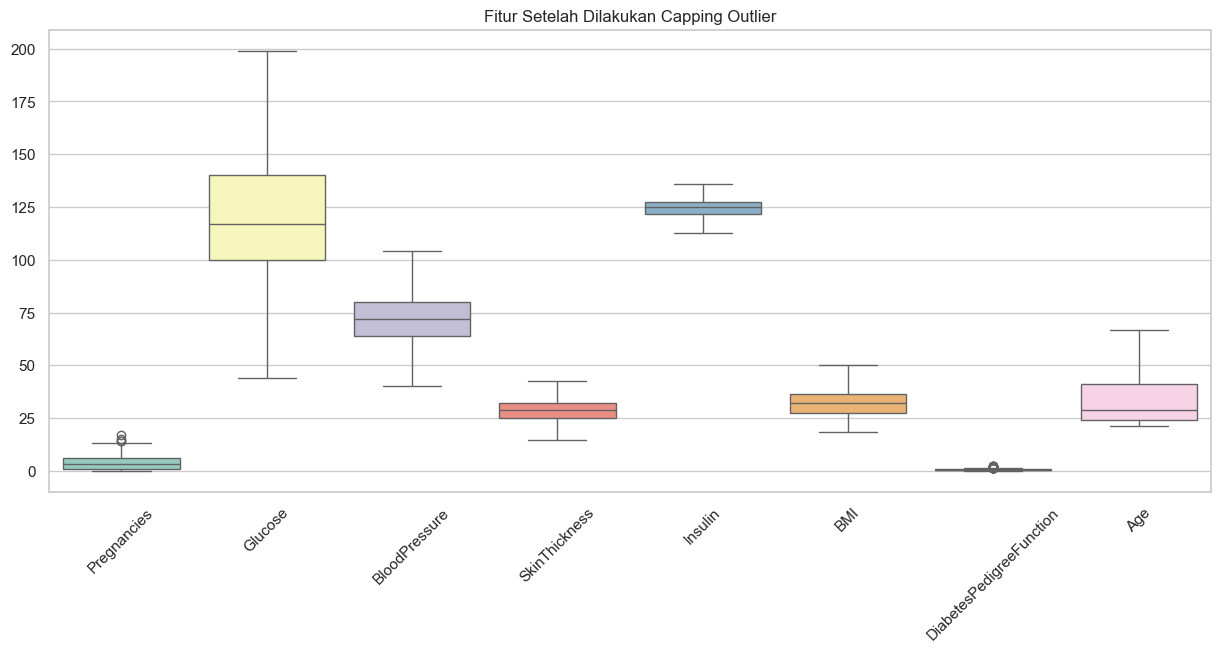

Jumlah baris : 768


In [8]:
# menangani outlier
def cap_outliers(df, columns):
    df_capped = df.copy()
    for col in columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

# Terapkan capping
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
df_final = cap_outliers(df, cols_to_fix)

plt.figure(figsize=(15, 6))
sns.boxplot(data=df_final.drop(columns=['Outcome']), palette="Set3")
plt.title("Fitur Setelah Dilakukan Capping Outlier")
plt.xticks(rotation=45)
plt.show()

print(f"Jumlah baris : {df_final.shape[0]}")

In [9]:
X = df_final.drop(columns=['Outcome'])
y = df_final['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

df_preprocessed_final = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)
df_preprocessed_final.to_csv('diabetes_preprocessed.csv', index=False)

display(df_preprocessed_final.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.030632,0.824667,0.039062,0.181092,0.468492,1.445691,1
1,-0.844885,-1.205066,-0.543914,0.017945,0.039062,-0.869465,-0.365061,-0.189304,0
2,1.233880,2.016662,-0.715008,0.017945,0.039062,-1.364728,0.604397,-0.103252,1
3,-0.844885,-1.073567,-0.543914,-0.788777,-1.494110,-0.644346,-0.920763,-1.049828,0
4,-1.141852,0.504422,-2.768136,0.824667,1.414175,1.606849,5.484909,-0.017199,1
